# <font color=#005ce8> Predicting Graduate Admissions </font>
<br>
<p> Autor: Eduardo Kaneko </p>
<p> Date: 23.02.2019 </p>

## Problem Description
______
<p> This dataset is created for prediction of graduate admissions from an Indian perspective. </p>

*A computer program is said to learn from **experience E** with respect to some class of **tasks T** and **performance measure P**, if its performance at tasks in T, as measured by P, improves with experience E.*
<p> 

**Task (T)**: Predict the student's chance of being approved or not. <br> <br>
**Experience (E)**: A bunch of students with some parameters where one of them is a chance of admit (ranging from 0 to 1).<br> <br>
**Performance (P)**: Classification accuracy, the number of students approved correctly out of all students considered as a percentage.
</p>

## Content Description
______
<p> The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : <br>  
    1. GRE Scores ( out of 340 ) <br>
    2. TOEFL Scores ( out of 120 ) <br>
    3. University Rating ( out of 5 ) <br>
    4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) <br>
    5. Undergraduate GPA ( out of 10 ) <br>
    6. Research Experience ( either 0 or 1 ) <br> 
    7. Chance of Admit ( ranging from 0 to 1 ). </p>

## Acknowledgements
______
<p> This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya. </p>

## Inspiration
______
<p> This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.</p>

<p>Besides that, I am solving the problem as a learning exercise. It's my first machine learning project by myself. So, I don't want use the most suitable method to solve the problem, but, instead, I want to explore methods that I'm not familiar with and I want to improve my knoweldge with methods that I already know in order to increase and learn new skills. </p>

## Citations
______
<p> Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019</p>

## <font> Content: </font>

* [1. Importing the libraries](#import)
* [2. Loading and Assessing the data](#load)
* [3. Statistical Looking](#sl)
* [4. Splitting Data for Training and Testing](#split)
* [5. Linear Regression](#lr)
* [6. Statistical Information with StatsModel](#stats)
* [7. Logistic Regression Model](#logmodel)
* [8. Support Vector Machine](#svm)
* [9. Decision Tree](#dt)
* [10.KNN Model](#kn)
* [11.Comparision Between Models](#comp)

<h3><a id="import" class="anchor"><font color=#005ce8>1 - Importing the libraries</font></a></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

<h3><a id="load" class="anchor"><font color=#005ce8>2 - Loading and Assessing the data</font></a></h3>

In [2]:
df= pd.read_csv('Admission_Predict.csv')

In [3]:
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Looking to the data
print("Rows: {}".format(df.shape[0]))
print("Columns: {}".format(df.shape[1]))

Rows: 400
Columns: 9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


*There is no problem of completeness.*

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


<h3><a id="sl" class="anchor"><font color=#005ce8>3 - Statistical Looking</font></a></h3>

**(3.1) Check if there are linear correlations between the parameters**

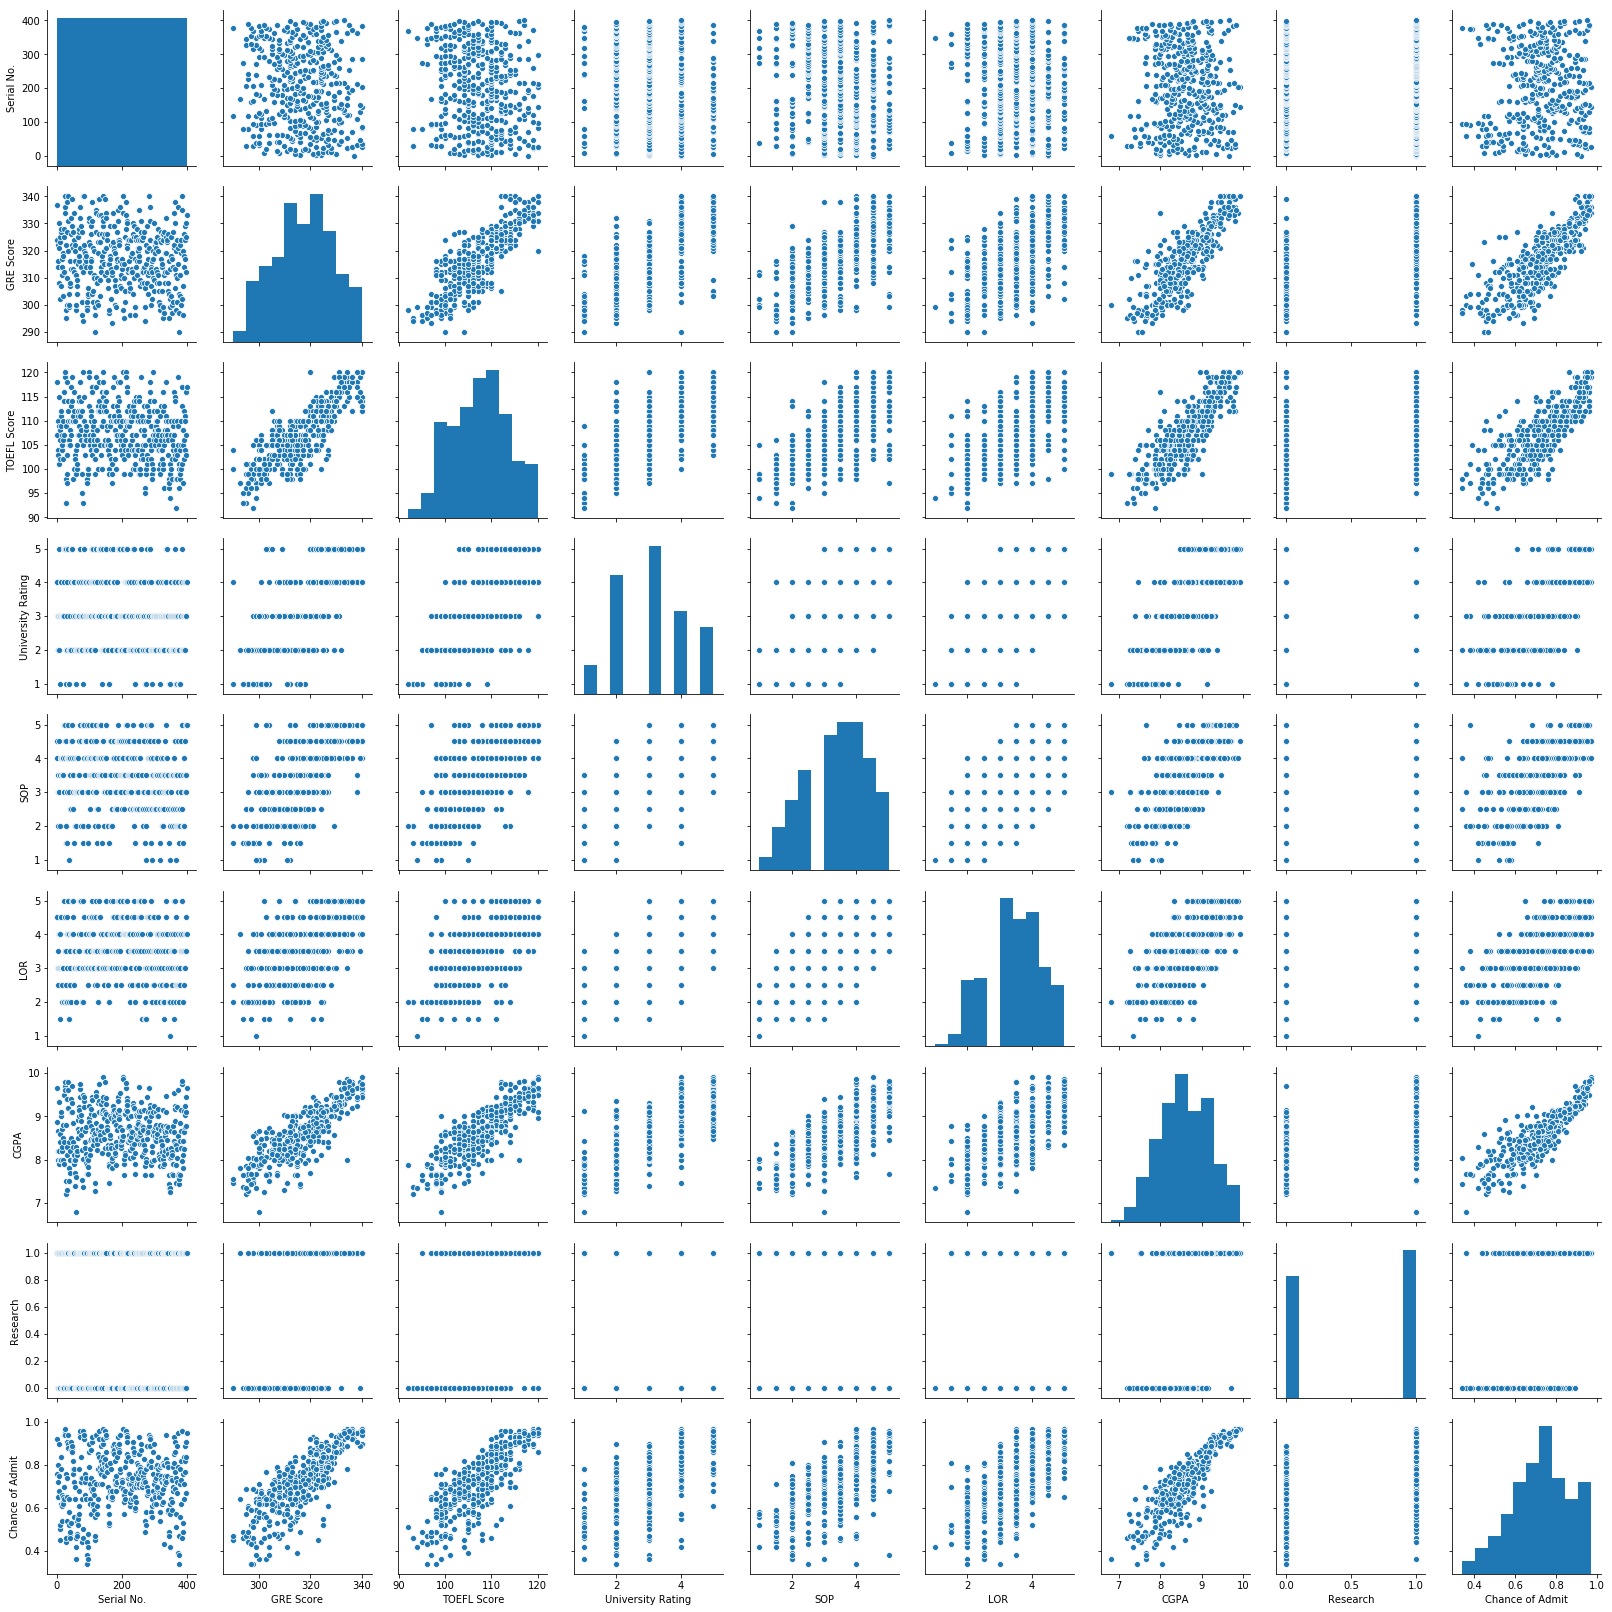

In [8]:
sns.pairplot(df);

Seens that GRE_SCORE; TOEFL_SCORE and CGPA have high correlation with 'Chance of Admit', let's take a nearest look.

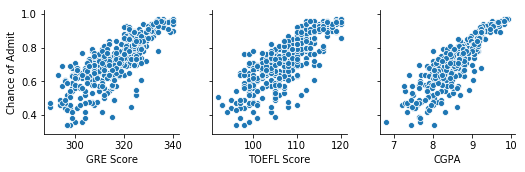

In [9]:
g = sns.pairplot(df, x_vars=["GRE Score", "TOEFL Score", "CGPA"],
                     y_vars=["Chance of Admit"])

We can observe a *strong strength* and a *positive direction* between `GRE Score`, `TOEFL Score` and `CGPA` with `Chance of Admit`.

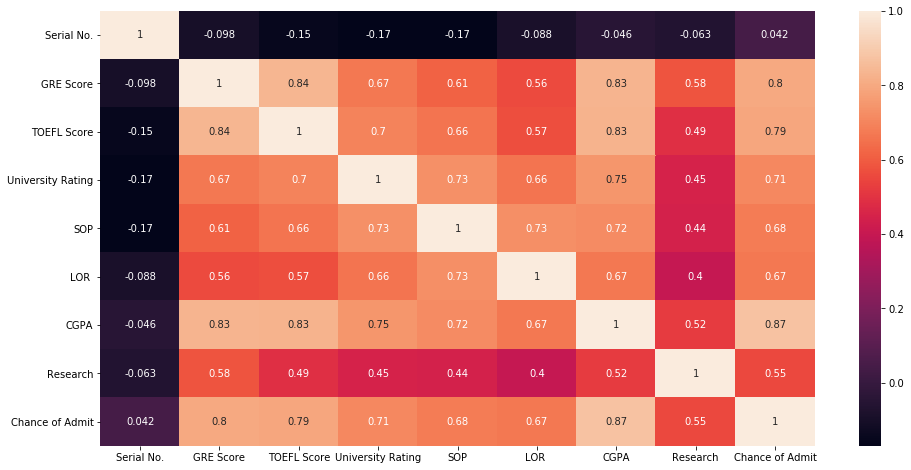

In [10]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True);

The term "correlation" refers to a mutual relationship or association between quantities. As the correlation coefficient `r` of `GRE`, `TOEFL` and `CGPA` with `Chance of Admit` is 0.8, 0.79 and 0.87. We can conclude that there are a truly positive and strong correlation between the parameters and `Chance of Admit`.

**(3.2) Distribution of Parameters:**

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


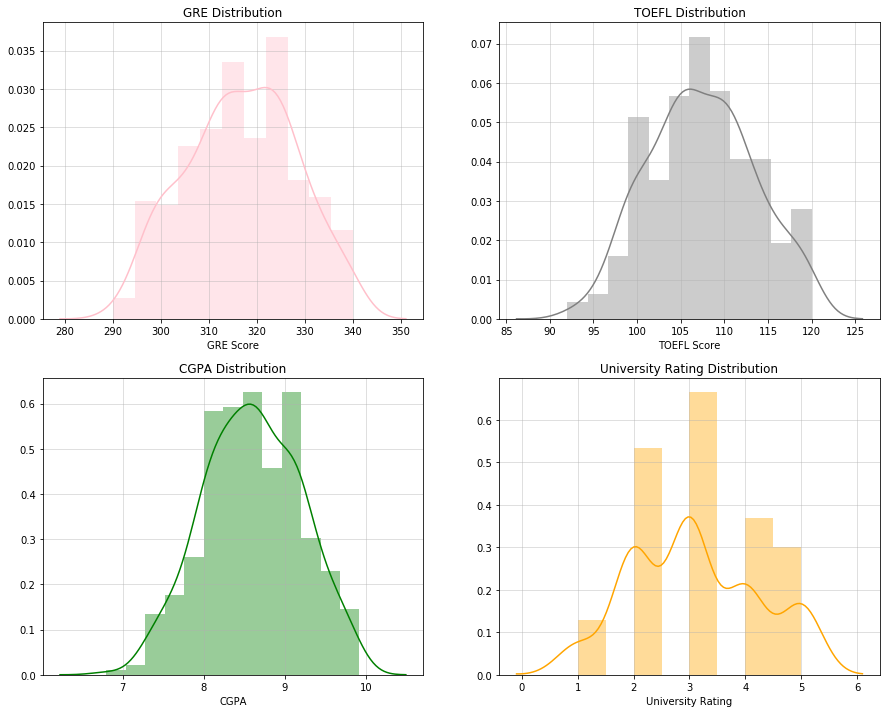

In [11]:
plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
sns.distplot(df['GRE Score'], color='Pink')
plt.title("GRE Distribution")
plt.grid(alpha=0.5)


plt.subplot(2, 2, 2)
sns.distplot(df['TOEFL Score'], color='Grey')
plt.title("TOEFL Distribution")
plt.grid(alpha=0.5)


plt.subplot(2, 2, 3)
sns.distplot(df['CGPA'], color='Green')
plt.title("CGPA Distribution")
plt.grid(alpha=0.5)


plt.subplot(2, 2, 4)
sns.distplot(df['University Rating'], color='Orange')
plt.title("University Rating Distribution")
plt.grid(alpha=0.5)

**(3.3) Analysis on Research Column:**

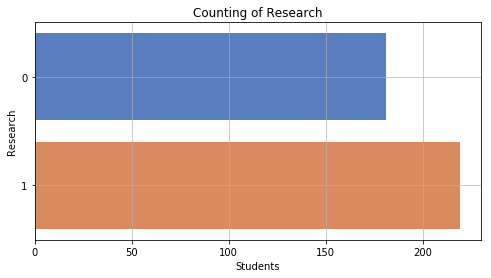

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['Research'], palette="muted")
plt.grid(alpha=0.8)
plt.title("Counting of Research")
plt.xlabel('Students')
plt.show()

In [13]:
researchers = (df['Research'] == 1).sum()
non_researchers = (df['Research'] == 0).sum()
research_percentage = (researchers/len(df)*100)

print("Number of Researchers: {}".format(researchers))
print("Number of Non-researchers: {}".format(non_researchers))
print("Percentage of students with research: {}%".format(research_percentage))

Number of Researchers: 219
Number of Non-researchers: 181
Percentage of students with research: 54.75%


**(3.4) University Rating:**

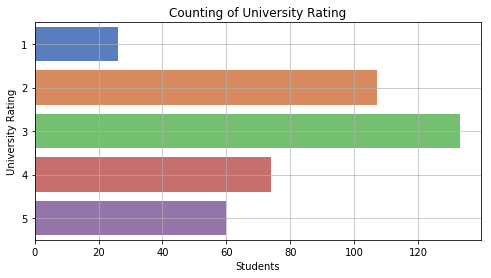

In [14]:
plt.figure(figsize=(8,4))
plt.title("Counting of University Rating")
sns.countplot(y=df['University Rating'], palette="muted")
plt.grid(alpha=0.8)
plt.xlabel('Students')
plt.show()

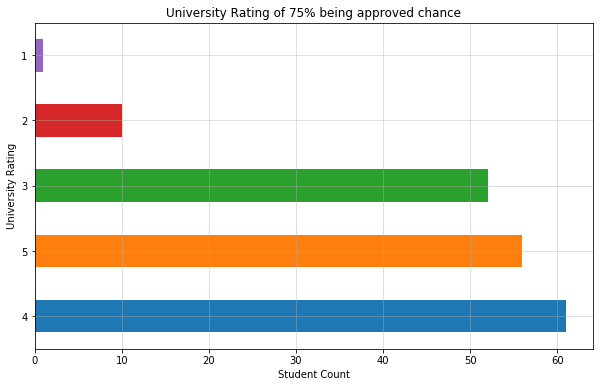

In [15]:
plt.figure(figsize=(10,6))
university_influence = df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts()
university_influence.plot(kind='barh')
plt.title("University Rating of 75% being approved chance")
plt.grid(alpha=0.5)
plt.xlabel('Student Count')
plt.ylabel('University Rating')
plt.show()

In [16]:
rating_one = ((university_influence.iloc[4]/((df['University Rating']==1).sum()))*100)
rating_two = ((university_influence.iloc[3]/((df['University Rating']==2).sum()))*100)
rating_three = ((university_influence.iloc[2]/((df['University Rating']==3).sum()))*100)
rating_four = ((university_influence.iloc[0]/((df['University Rating']==4).sum()))*100)
rating_five = ((university_influence.iloc[1]/((df['University Rating']==5).sum()))*100)

In [17]:
print("Percentage of >75% being approved by university rating")
print('University Rating 1: {0: .2f}%'.format(rating_one))
print('University Rating 2: {0: .2f}%'.format(rating_two))
print('University Rating 3: {0: .2f}%'.format(rating_three))
print('University Rating 4: {0: .2f}%'.format(rating_four))
print('University Rating 5: {0: .2f}%'.format(rating_five))

Percentage of >75% being approved by university rating
University Rating 1:  3.85%
University Rating 2:  9.35%
University Rating 3:  39.10%
University Rating 4:  82.43%
University Rating 5:  93.33%


**(3.5) Mean and Standard Deviation of `GRE`, `TOEFL` and `CGPA`:** <br> <br>
Standard Deviation is a statistical term used to measure the amount of variability or dispersion around an average. Technically it is a measure of volatility. Dispersion is the difference between the actual and the average value. The larger this dispersion or variability is, the higher is the standard deviation.

In [18]:
gre_avg = df['GRE Score'].mean()
gre_std = df['GRE Score'].std()
print("Maximum GRE Score : ", np.max(df['GRE Score']))
print("Average GRE Score : ",gre_avg)
print("Standard Deaviation : ",gre_std)

Maximum GRE Score :  340
Average GRE Score :  316.8075
Standard Deaviation :  11.473646113500477


In [19]:
diff = df['GRE Score']-gre_avg
df['SD_GRE'] = diff/gre_std

In [20]:
toefl_avg = df['TOEFL Score'].mean()
toefl_std = df['TOEFL Score'].std()
print("Maximum TOEFL Score : ", np.max(df['TOEFL Score']))
print("Average TOEFL Score : ",toefl_avg)
print("Standard Deaviation : ",toefl_std)

Maximum TOEFL Score :  120
Average TOEFL Score :  107.41
Standard Deaviation :  6.069513777374129


In [21]:
diff = df['TOEFL Score']-toefl_avg
df['SD_TOEFL'] = diff/toefl_std

In [22]:
cgpa_avg = df['CGPA'].mean()
cgpa_std = df['CGPA'].std()
print("Maximum CGPA Score : ", np.max(df['CGPA']))
print("Average CGPA Score : ",cgpa_avg)
print("Standard Deaviation : ",cgpa_std)

Maximum CGPA Score :  9.92
Average CGPA Score :  8.598924999999998
Standard Deaviation :  0.5963170964964317


In [23]:
diff = df['CGPA']-cgpa_avg
df['SD_CGPA'] = diff/cgpa_std

In [24]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,SD_GRE,SD_TOEFL,SD_CGPA
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.759903,1.744786,1.762611
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.626871,-0.067551,0.454582
2,3,316,104,3,3.0,3.5,8.00,1,0.72,-0.070379,-0.561824,-1.004373
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.452559,0.426723,0.119190
4,5,314,103,2,2.0,3.0,8.21,0,0.65,-0.244691,-0.726582,-0.652212


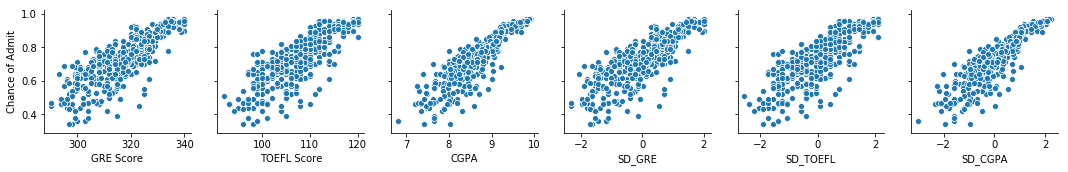

In [25]:
# Plotting new parameters against Chance of Admit
sns.pairplot(df, 
             x_vars=['GRE Score','TOEFL Score','CGPA','SD_GRE','SD_TOEFL','SD_CGPA'], 
             y_vars='Chance of Admit');

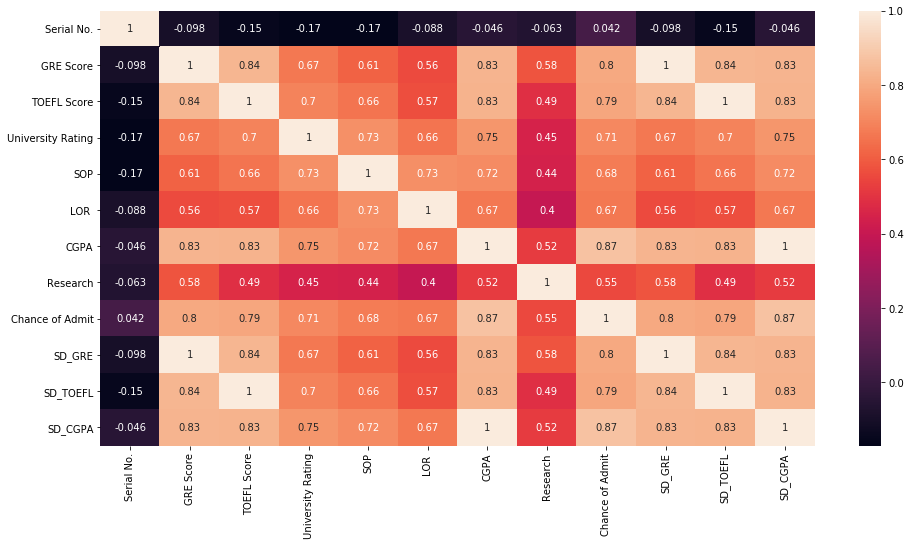

In [26]:
# Constructing Heatmap of Corelation for new parameters against 'Chance of Admit':
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True);

<h3><a id="split" class="anchor"><font color=#005ce8>4 - Splitting Data for Training and Testing</font></a></h3>

In [27]:
X = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit']

In [28]:
# Importing module and splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 42)

<h3><a id="lr" class="anchor"><font color=#005ce8>5 - Linear Regression</font></a></h3>

**(5.1) Importing the library and fitting the model:**

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**(5.2) The Co-Efficients for the following parameters:**

In [30]:
coef = pd.DataFrame(lr.coef_, X_test.columns, columns = ['Co-efficiente'])
coef

,Co-efficiente
Serial No.,0.000181
GRE Score,0.001943
TOEFL Score,0.003455
University Rating,0.010820
SOP,0.001943
LOR,0.016574
CGPA,0.025873
Research,0.021687
SD_GRE,0.000169
SD_TOEFL,0.000569


From above we can infer that :

- If GRE Score increases by 1 then Chance of Admit will be affected by 0.001943 <br>
- If TOEFL increases by 1 then Chance of Admit will be affected by 0.003455 <br>
- If University Rating increases by 1 then Chance of Admit will be affected by 0.010820 <br>

In [31]:
pred_lr = lr.predict(X_test)

In [32]:
len(X_test)

80

**(5.3) Plotting Actual VS Predicted Values:**

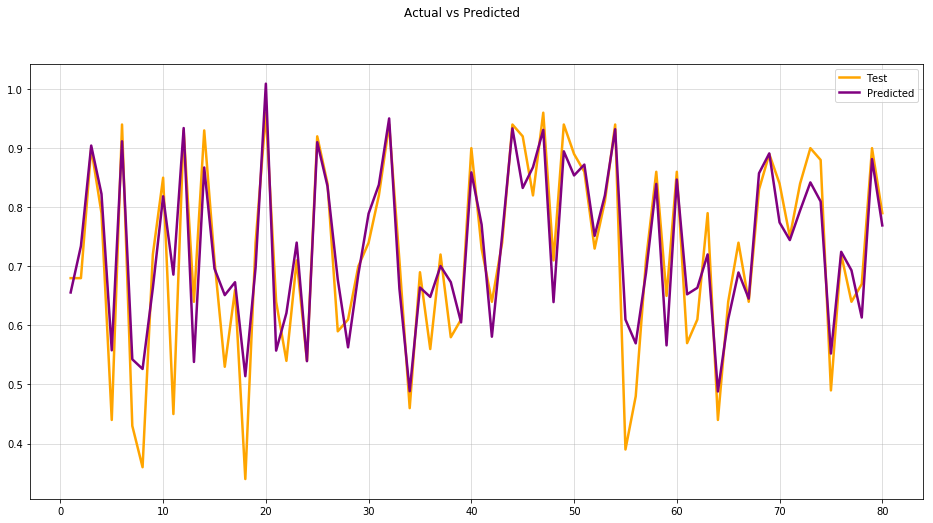

In [33]:
fig = plt.figure(figsize=(16,8))
c = [i for i in range(1,81,1)]
plt.plot(c, y_test, color = 'orange', linewidth = 2.5, label='Test')
plt.plot(c, pred_lr, color = 'purple', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.5)
plt.legend()
fig.suptitle('Actual vs Predicted');

**(5.4) Calculating Error Terms:**

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
mse = mean_squared_error(y_test, pred_lr)
r_squared_score = r2_score(y_test, pred_lr)

In [36]:
print('Mean Square Error = {0: .5f}'.format(mse))
print('R_Square Score = {0: .5f}'.format(r_squared_score))

Mean Square Error =  0.00462
R_Square Score =  0.82122


Text(0.5, 0.98, 'Error Terms')

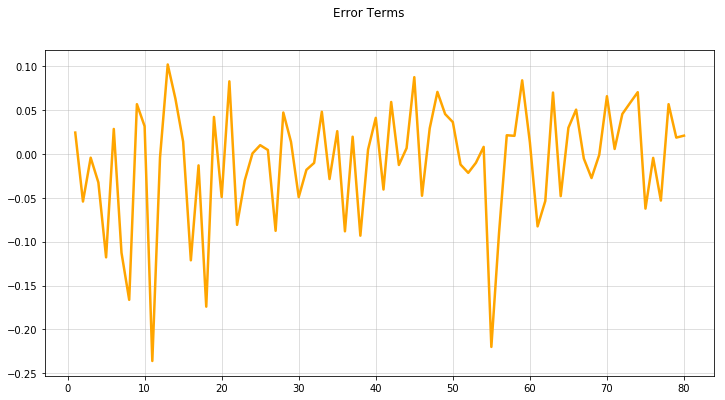

In [37]:
fig = plt.figure(figsize=(12,6))
plt.plot(c,y_test-pred_lr, color = 'orange', linewidth = 2.5)
plt.grid(alpha = 0.5)
fig.suptitle('Error Terms')

<h3><a id="stats" class="anchor"><font color=#005ce8>6 - Statistical Information with StatsModel</font></a></h3>

In [38]:
import statsmodels.api as sm

In [39]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lml = sm.OLS(y_train, X_train_sm).fit()
lml.params

const               -0.000563
Serial No.           0.000181
GRE Score            0.000600
TOEFL Score          0.001858
University Rating    0.010820
SOP                  0.001943
LOR                  0.016574
CGPA                 0.022304
Research             0.021687
SD_GRE               0.015588
SD_TOEFL             0.010263
SD_CGPA              0.045517
dtype: float64

In [40]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          2.16e-109
Time:                        06:38:30   Log-Likelihood:                 451.53
No. Observations:                 320   AIC:                            -885.1
Df Residuals:                     311   BIC:                            -851.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0006      0.00

### Inferences
______
<p> We can infer:

- For each unit increase on `GRE Score`, as long as all the other variables stay the same, the `Chance of Admit` will increase by **0.0006**. <br>
- For each unit increase on `TOEFL Score`, as long as all the other variables stay the same, the `Chance of Admit` will increase by **0.0019**. <br> 
- For each unit increase on `University Rating`, as long as all the other variables stay the same, the `Chance of Admit` will increase by **0.0108**. <br> 
- For each unit increase on `CGPA Score`, as long as all the other variables stay the same, the `Chance of Admit` will increase by **0.0223**. </p>

<p> Re-Valuating the Data:

- If 'p > 0.05' for a 95% level of confidence:

    - {$Ho$} : Value is not significant
    - {$H1$} : Value is significant Since in GRE p(0.065) > 0.05 so 'we fail to reject Ho' </p>

In [41]:
X_new = df.drop(['Serial No.','University Rating','SOP','Chance of Admit'], axis=1)
y_new = df['Chance of Admit']

In [42]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, 
                                                                    y_new, 
                                                                    train_size = 0.7, 
                                                                    random_state = 42)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [43]:
lr.fit(X_train_new, y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_pred_new = lr.predict(X_test_new)

In [45]:
len(X_test_new)

120

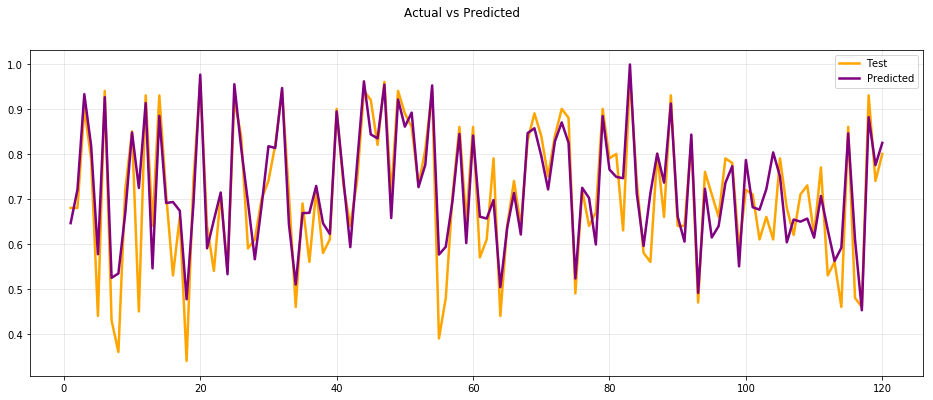

In [46]:
# Actual vs Predicted after removing GRE
fig = plt.figure(figsize=(16,6))
c = [i for i in range(1,121,1)]
plt.plot(c, y_test_new, color = 'orange', linewidth = 2.5, label='Test')
plt.plot(c, y_pred_new, color = 'purple', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted');

In [47]:
mse_new = mean_squared_error(y_test_new, y_pred_new)
r_square_score_new = r2_score(y_test_new, y_pred_new)
print('Mean Square Error = ',mse_new)
print('R_Square Score = ',r_square_score_new)

Mean Square Error =  0.004655184478338653
R_Square Score =  0.7954953638420265


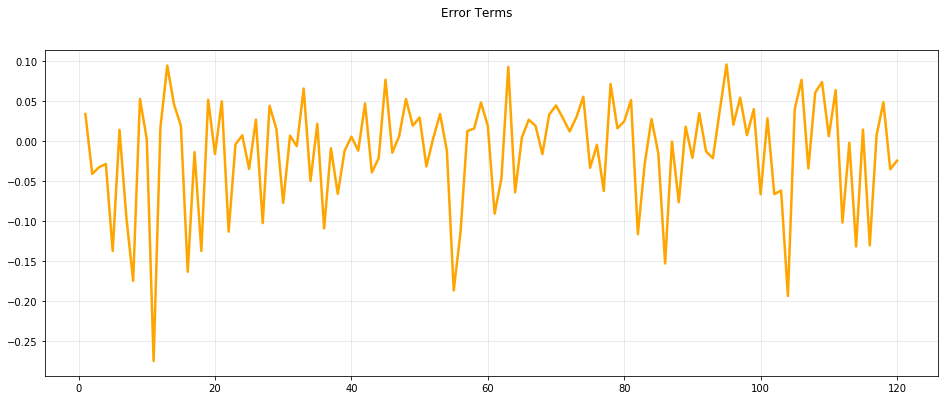

In [48]:
fig = plt.figure(figsize=(16,6))
plt.plot(c,y_test_new-y_pred_new, color = 'orange', linewidth = 2.5)
plt.grid(alpha = 0.3)
fig.suptitle('Error Terms');

<h3><a id="logmodel" class="anchor"><font color=#005ce8>7 - Logistic Regression Model</font></a></h3>

**(7.1) Importing the model:**

In [49]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

**Observations**

Since Logistic Regression is a Classification model, 'Continuous Data' will not help to classify the output. Hence we need to categorize the data into:
- Label 1 for Chance of Admit greater or equal to 80% <br>
- Label 0 for Chance of Admit lesser than 80%

In [50]:
y_train_label = [1 if each > 0.8 else 0 for each in y_train]
y_test_label  = [1 if each > 0.8 else 0 for each in y_test]

In [51]:
logmodel.fit(X_train, y_train_label)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
pred_log = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label, pred_log))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.96      0.93      0.95        29

   micro avg       0.96      0.96      0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [54]:
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test_label, pred_log)

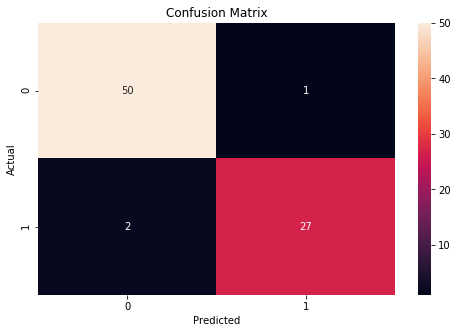

In [55]:
plt.figure(figsize=(8, 5))
sns.heatmap(cm_log, annot=True)
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.ylabel("Actual");

**(7.2) Looking for the main metrics:**

In [64]:
y_pred = logmodel.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = (accuracy_score(y_test_label, y_pred)*100)

precision = (precision_score(y_test_label, y_pred)*100)

recall = (recall_score(y_test_label, y_pred)*100)

f1 = (f1_score(y_test_label, y_pred)*100)

print("Accuracy:{0: .2f}%".format(accuracy))
print("Precision:{0: .2f}%".format(precision))
print("Recall:{0: .2f}%".format(recall))
print("F1:{0: .2f}%".format(f1))

Accuracy: 96.25%
Precision: 96.43%
Recall: 93.10%
F1: 94.74%


**(7.3) Explanation about the metrics used:**

#### Accuracy Score:
<p>Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. In ou case, the accuracy is <b>0.9625.</b> <br>
$(TP+TN)/(TP+FP+FN+TN)$ </p>

#### Precision Score:
<p>Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. In our case, the precision is <b>0.9643.</b> <br>
$(TP)/(TP+FP)$
</p>

#### Recall Score:
<p>(Sensitivity) Recall is the ratio of correctly predicted positive observations to the all observations in actual class.In our case, the recall is <b>0.9310.</b><br>
$TP/(TP+FN)$
</p>

#### F1 Score:
<p>F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 Score is <b>0.9474.</b> <br>
$2*(Recall * Precision) / (Recall + Precision)$
</p>


 

<h3><a id="svm" class="anchor"><font color=#005ce8>8 - Support Vector Machine</font></a></h3>

In [70]:
from sklearn.svm import SVC
svc = SVC()

In [71]:
svc.fit(X_train, y_train_label)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [72]:
pred_svm = svc.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_label, pred_svm)

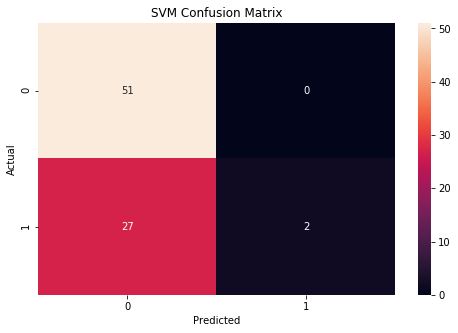

In [91]:
plt.figure(figsize=(8,5))
sns.heatmap(cm_svm, annot=True)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = (accuracy_score(y_test_label, pred_svm)*100)

precision = (precision_score(y_test_label, pred_svm)*100)

recall = (recall_score(y_test_label, pred_svm)*100)

f1 = (f1_score(y_test_label, pred_svm)*100)

print("Accuracy:{0: .2f}%".format(accuracy))
print("Precision:{0: .2f}%".format(precision))
print("Recall:{0: .2f}%".format(recall))
print("F1:{0: .2f}%".format(f1))

Accuracy: 66.25%
Precision: 100.00%
Recall: 6.90%
F1: 12.90%


<h3><a id="dt" class="anchor"><font color=#005ce8>9 - Decision Tree</font></a></h3>

In [83]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train, y_train_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [85]:
pred_dt = dt_reg.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test_label, pred_dt)

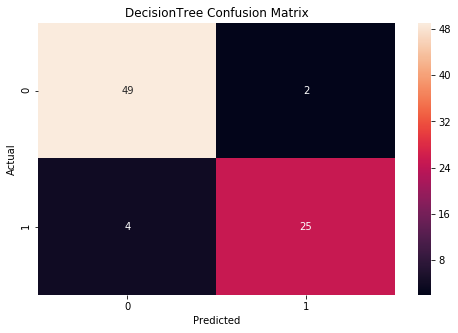

In [90]:
plt.figure(figsize=(8,5))
sns.heatmap(cm_dt, annot=True)
plt.title("DecisionTree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = (accuracy_score(y_test_label, pred_dt)*100)

precision = (precision_score(y_test_label, pred_dt)*100)

recall = (recall_score(y_test_label, pred_dt)*100)

f1 = (f1_score(y_test_label, pred_dt)*100)

print("Accuracy:{0: .2f}%".format(accuracy))
print("Precision:{0: .2f}%".format(precision))
print("Recall:{0: .2f}%".format(recall))
print("F1:{0: .2f}%".format(f1))

Accuracy: 92.50%
Precision: 92.59%
Recall: 86.21%
F1: 89.29%


<h3><a id="kn" class="anchor"><font color=#005ce8>10 - KNN Model</font></a></h3>

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [94]:
import math
math.sqrt(len(y_test_label))

8.94427190999916

In [95]:
knnclf = KNeighborsClassifier(n_neighbors=10, p=2, metric='euclidean')

In [96]:
knnclf.fit(X_train, y_train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [97]:
pred_knn = knnclf.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_label, pred_knn)

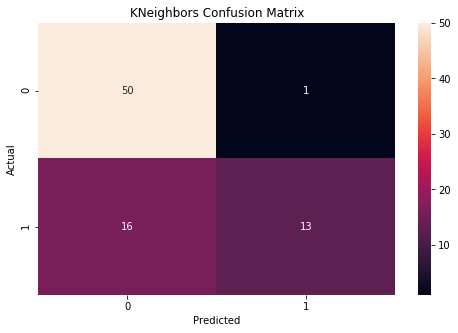

In [99]:
plt.figure(figsize=(8,5))
sns.heatmap(cm_knn, annot=True)
plt.title("KNeighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = (accuracy_score(y_test_label, pred_knn)*100)

precision = (precision_score(y_test_label, pred_knn)*100)

recall = (recall_score(y_test_label, pred_knn)*100)

f1 = (f1_score(y_test_label, pred_knn)*100)

print("Accuracy:{0: .2f}%".format(accuracy))
print("Precision:{0: .2f}%".format(precision))
print("Recall:{0: .2f}%".format(recall))
print("F1:{0: .2f}%".format(f1))

Accuracy: 78.75%
Precision: 92.86%
Recall: 44.83%
F1: 60.47%


<h3><a id="comp" class="anchor"><font color=#005ce8>11 - Comparision Between Models</font></a></h3>

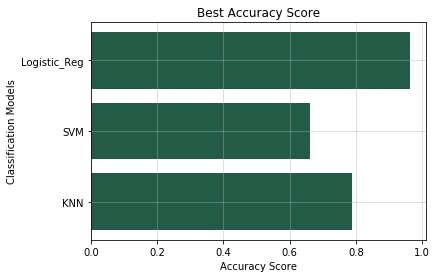

In [102]:
x = ["KNN","SVM","Logistic_Reg"]
y = np.array([accuracy_score(y_test_label, pred_knn),accuracy_score(y_test_label, pred_svm),accuracy_score(y_test_label, pred_log)])
plt.barh(x,y, color='#225b46')
plt.xlabel("Accuracy Score")
plt.ylabel("Classification Models")
plt.title("Best Accuracy Score")
plt.grid(alpha=0.5)
plt.show()